In [29]:
# this script aims to evaluate the best-performing model using the newly created evaluation data.

from google.colab import drive
drive.mount('/content/drive')

# Measure the time taken to import dependencies, load data, and make a successful prediction
start_time = time.time()

# import dependencies
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report

import time

# Load the saved Keras model
saved_model_path = "drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Models/simplenn_Standardized91.8367326259613%.keras"
model = load_model(saved_model_path)

# Load your dataset
test_data_path = "drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/evaluation_eeg_data.csv"
X = pd.read_csv(test_data_path)
# load the y_data
y_data_path = "drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/labels.csv"
y = pd.read_csv(y_data_path)

# Filter rows with NaN values
nan_rows_index = X[X.isna().any(axis=1)].index

# remove the Nan rows and their corresponding labels
X = X.drop(nan_rows_index)
y = y.drop(nan_rows_index)

# Shuffle X and y
# Create a random permutation of the row indices
random_indices = np.random.permutation(len(X))

# Shuffle both X and y based on the same random permutation
X = X.iloc[random_indices].reset_index(drop=True)
y = y.iloc[random_indices].reset_index(drop=True)

# Preprocess your test data as needed (e.g., scaling, encoding)
#scale the X data by standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Assuming X_test is your feature dataset and y_test is your target dataset
# Replace 'feature_columns' with the actual feature columns in your test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=123)



# Test the loaded model on the test data
# Make predictions
predictions = model.predict(X_test)

# End time measurement
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("Total time taken:", total_time, "seconds")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 [==============================] - 0s 3ms/step
Total time taken: 0.2842381000518799 seconds


In [30]:
# Perform any further evaluation as needed (e.g., calculating accuracy, confusion matrix)
# For example:
evaluation = model.evaluate(X_test, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])
# y

4/4 [==============================] - 0s 5ms/step - loss: 0.6809 - accuracy: 0.6881 - auc: 0.7638
Test Loss: 0.6808541417121887
Test Accuracy: 0.6880733966827393


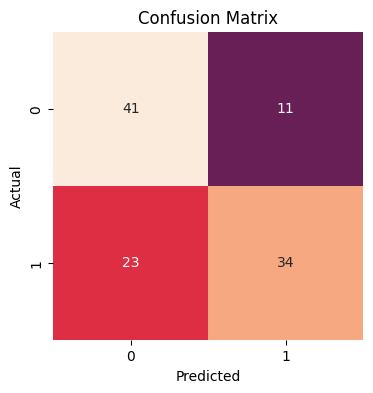

In [31]:

# evaluate the confusion matrix
y_true = np.array(y_test)

y_pred = np.squeeze(predictions)
y_pred = np.array(y_pred >= 0.5, dtype=int)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

# You can use predictions for further analysis or evaluation
